In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Data processing, modeling, and model evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier

#Files
import h5py
import glob
import seaborn as sns

In [2]:
f=h5py.File(r'features_database_gait_one_cycles_both_legs.h5', 'r')
print(list(f.keys()))
x = f['right'][:,:,:]
print('(samples, timesteps, features)', x.shape)
y = f['left'][:,:,:]
print('(samples, timesteps, features)', y.shape)

['left', 'right']
(samples, timesteps, features) (74, 132, 7)
(samples, timesteps, features) (76, 132, 7)


In [3]:
nsamples, nx, ny = x.shape
d2_x = x.reshape((nsamples,nx*ny))

scaler = StandardScaler()
scaled_data = scaler.fit_transform(d2_x)
scaled_data.shape

(74, 924)

In [4]:
nsamples, nx, ny = y.shape
d2_x = y.reshape((nsamples,nx*ny))

scaler = StandardScaler()
scaled_data_l = scaler.fit_transform(d2_x)
scaled_data_l.shape

(76, 924)

In [5]:
pca = PCA(n_components=74, svd_solver='full')
pca.fit(scaled_data)
X_pca = pca.transform(scaled_data)

pca_l = PCA(n_components=76, svd_solver='full')
pca_l.fit(scaled_data_l)
X_pca_l = pca_l.transform(scaled_data_l)

In [6]:
cum_exp_var = []
cum_exp_var_l = []
var_exp = 0
var_exp_l = 0

for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)
    
for k in pca_l.explained_variance_ratio_:
    var_exp_l += k
    cum_exp_var_l.append(var_exp_l)

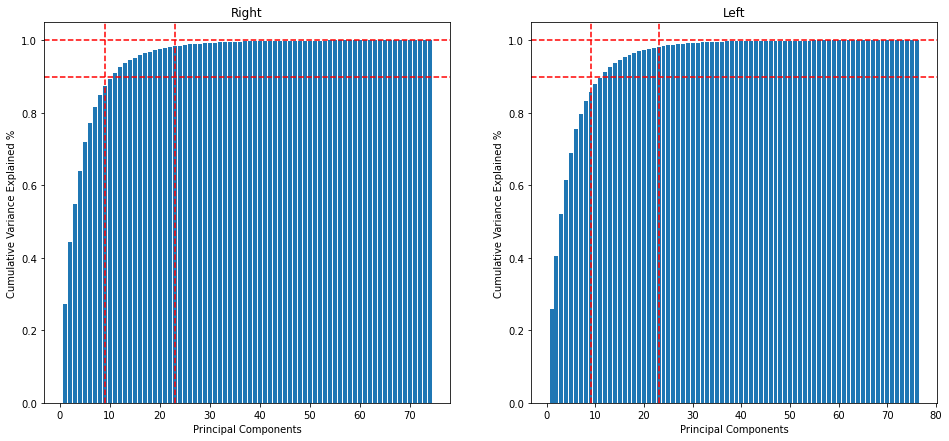

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(16,7))

ax[0].bar(range(1,75), cum_exp_var)
ax[0].set_xlabel('Principal Components')
ax[0].set_ylabel('Cumulative Variance Explained %')
ax[0].set_title('Right')
ax[0].axhline(y=1.0, color = 'red', linestyle='--')
ax[0].axhline(y=0.9, color = 'red', linestyle='--')
ax[0].axvline(x=9.0, color = 'red', linestyle='--')
ax[0].axvline(x=23.0, color = 'red', linestyle='--')

ax[1].bar(range(1,77), cum_exp_var_l)
ax[1].set_xlabel('Principal Components')
ax[1].set_ylabel('Cumulative Variance Explained %')
ax[1].set_title('Left')
ax[1].axhline(y=1.0, color = 'red', linestyle='--')
ax[1].axhline(y=0.9, color = 'red', linestyle='--')
ax[1].axvline(x=9.0, color = 'red', linestyle='--')
ax[1].axvline(x=23.0, color = 'red', linestyle='--')


In [8]:
def decision_tree(scaled_data, ran, digits_int):
    from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
    train_f1 = []
    test_f1 = []

    for i in range(ran):
    
        X = scaled_data[:,0:i+1]
    
        # Train-test-split
        X_train, X_test, y_train, y_test = train_test_split(X, digits_int,
                                                            test_size=0.25,
                                                            random_state=42)

        # Perform feature scaling
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        dtc = DecisionTreeClassifier()
        dtc.fit(X_train, y_train)
        y_pred_train = dtc.predict(X_train)
        y_pred_test = dtc.predict(X_test)
        train_f1.append(f1_score(y_train, y_pred_train))
        test_f1.append(f1_score(y_test, y_pred_test))
    
    return train_f1, test_f1

In [9]:
def knn_tree(scaled_data, ran, digits_int):
    from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
    train_f1 = []
    test_f1 = []

    for i in range(ran):
    
        X = scaled_data[:,0:i+1]
    
        # Train-test-split
        X_train, X_test, y_train, y_test = train_test_split(X, digits_int,
                                                            test_size=0.25,
                                                            random_state=42)

        # Perform feature scaling
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        knn = KNeighborsClassifier()
        knn.fit(X_train, y_train)
        y_pred_train = knn.predict(X_train)
        y_pred_test = knn.predict(X_test)
        train_f1.append(f1_score(y_train, y_pred_train))
        test_f1.append(f1_score(y_test, y_pred_test))
    
    return train_f1, test_f1

In [10]:
def digits(path,ran):
    filelist =[]
    digits =[]
    digits_int =[]
    for file in glob.glob(f'{path}\\*.c3d',recursive = True):
        filelist.append(file[4:-4].replace("_", ""))
        digits.append(file[ran:-9])

    for ele in digits:
        digits_int.append(1) if ele=='degeneration' else digits_int.append(0)
    len(digits_int)
    
    return digits_int 

In [12]:
d_r = digits(f'cut_one_gait_cycle_right', 25)
d_l = digits(f'cut_one_gait_cycle_left', 24)
train_l, test_l = decision_tree(X_pca_l, 76, d_l)
train_r, test_r = decision_tree(X_pca, 74, d_r)

In [14]:
# d_l

Text(0.5, 1.0, 'Left site')

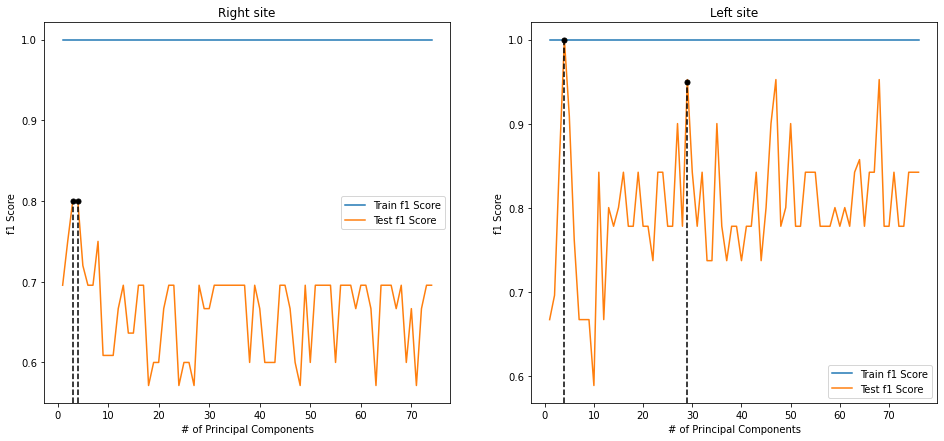

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(16,7))

ax[0].plot(range(1,75), train_r, label='Train f1 Score')
ax[0].plot(range(1,75), test_r, label='Test f1 Score')
ax[0].set_ylabel('f1 Score')
ax[0].set_xlabel('# of Principal Components')
ax[0].axvline(x=3.0,ymax=0.53, color = 'black', linestyle='--')
ax[0].axvline(x=4.0,ymax=0.53, color = 'black', linestyle='--')
ax[0].plot(3.0, 0.8, color='black', marker='o', markersize=5)
ax[0].plot(4.0, 0.8, color='black', marker='o', markersize=5)
ax[0].legend()
ax[0].set_title('Right site')

ax[1].plot(range(1,77), train_l, label='Train f1 Score')
ax[1].plot(range(1,77), test_l, label='Test f1 Score')
ax[1].set_ylabel('f1 Score')
ax[1].set_xlabel('# of Principal Components')
ax[1].axvline(x=4.0,ymax=0.95, color = 'black', linestyle='--')
ax[1].axvline(x=29.0,ymax=0.84, color = 'black', linestyle='--')
ax[1].plot(4.0, 1.0, color='black', marker='o', markersize=5)
ax[1].plot(29.0, 0.95, color='black', marker='o', markersize=5)
ax[1].legend()
ax[1].set_title('Left site')


In [42]:
train_l, test_l = knn_tree(X_pca_l, 76, d_l)
train_r, test_r = knn_tree(X_pca, 74, d_r)

Text(0.5, 1.0, 'Left site')

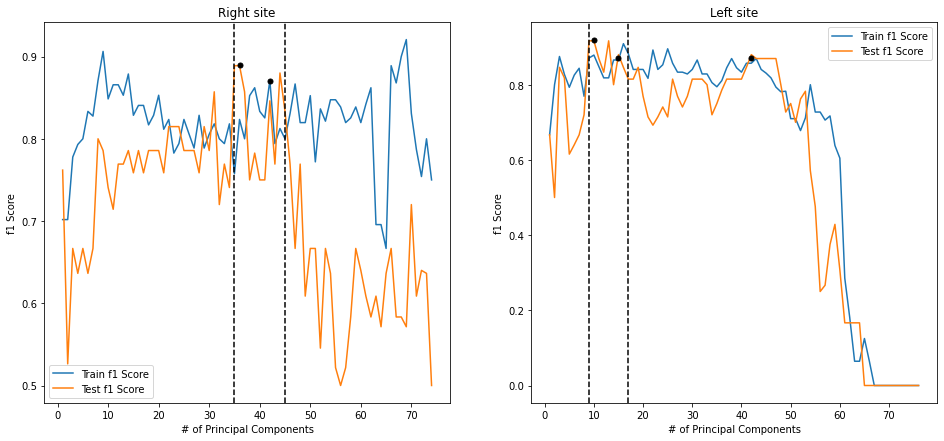

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(16,7))

ax[0].plot(range(1,75), train_r, label='Train f1 Score')
ax[0].plot(range(1,75), test_r, label='Test f1 Score')
ax[0].set_ylabel('f1 Score')
ax[0].set_xlabel('# of Principal Components')
ax[0].axvline(x=35.0, color = 'black', linestyle='--')
ax[0].axvline(x=45.0, color = 'black', linestyle='--')
ax[0].plot(36.0, 0.89, color='black', marker='o', markersize=5)
ax[0].plot(42.0, 0.87, color='black', marker='o', markersize=5)
ax[0].legend()
ax[0].set_title('Right site')

ax[1].plot(range(1,77), train_l, label='Train f1 Score')
ax[1].plot(range(1,77), test_l, label='Test f1 Score')
ax[1].set_ylabel('f1 Score')
ax[1].set_xlabel('# of Principal Components')
ax[1].axvline(x=9.0, color = 'black', linestyle='--')
ax[1].axvline(x=17.0, color = 'black', linestyle='--')
ax[1].plot(10.0, 0.92, color='black', marker='o', markersize=5)
ax[1].plot(15.0, 0.87, color='black', marker='o', markersize=5)
ax[1].plot(42.0, 0.87, color='black', marker='o', markersize=5)
ax[1].legend()
ax[1].set_title('Left site')